In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Load the dataset
df = pd.read_csv(r'C:\Users\Home\Downloads\Bank Customer Churn Prediction.csv')

In [5]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [14]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [67]:
df.isnull().sum()

credit_score        0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [69]:
# Define categorical and numerical columns
categorical_cols = ['gender']
numerical_cols = ['age','tenure','balance', 'products_number',
       'credit_card', 'active_member',
       'estimated_salary']

In [71]:
# Apply One-Hot Encoding for 'Geography' and 'Gender'
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0


In [75]:
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [77]:
##Outlier removal
df.describe().round(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00
mean,650.53,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.2,0.55
std,96.65,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.4,0.50
min,350.00,-1.99,-1.73,-1.23,-0.91,-1.55,-1.03,-1.74,0.0,0.00
25%,584.00,-0.66,-0.70,-1.23,-0.91,-1.55,-1.03,-0.85,0.0,0.00
50%,652.00,-0.18,-0.00,0.33,-0.91,0.65,0.97,0.00,0.0,1.00
75%,718.00,0.48,0.69,0.82,0.81,0.65,0.97,0.86,0.0,1.00
max,850.00,5.06,1.72,2.80,4.25,0.65,0.97,1.74,1.0,1.00


In [79]:
###Step 3:Model Building
# Define features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_probs

array([0.17528604, 0.08850647, 0.33746087, ..., 0.05504984, 0.04357838,
       0.16747995])

In [83]:
### Part 1:: Use of stratify

from imblearn.over_sampling import SMOTE
# Print class distribution before splitting
print("Class distribution before splitting:")
print(y.value_counts(normalize=True))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
# Print class distribution in the training set before oversampling
print("\nClass distribution in the training set after spliting ")
print(y_train.value_counts(normalize=True))
# Print class distribution in the training set before oversampling
print("\nClass distribution in the test set after spliting ")
print(y_test.value_counts(normalize=True))

Class distribution before splitting:
churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Class distribution in the training set after spliting 
churn
0    0.796286
1    0.203714
Name: proportion, dtype: float64

Class distribution in the test set after spliting 
churn
0    0.796333
1    0.203667
Name: proportion, dtype: float64


In [85]:
### Part 2:: Use of smote

from imblearn.over_sampling import SMOTE
# Print class distribution before splitting
print("Class distribution before splitting:")
print(y.value_counts(normalize=True))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Print class distribution in the training set before oversampling
print("\nClass distribution in the training set before oversampling:")
print(y_train.value_counts(normalize=True))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution in the training set after applying SMOTE
print("\nClass distribution in the training set after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Class distribution before splitting:
churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Class distribution in the training set before oversampling:
churn
0    0.796286
1    0.203714
Name: proportion, dtype: float64

Class distribution in the training set after SMOTE:
churn
0    0.5
1    0.5
Name: proportion, dtype: float64


ROC AUC Score: 0.7824740919065081

Classification Report for cutoff 0.2:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      2389
           1       0.37      0.75      0.50       611

    accuracy                           0.69      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.69      0.72      3000


Classification Report for cutoff 0.4:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2389
           1       0.58      0.35      0.44       611

    accuracy                           0.82      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.79      0.82      0.80      3000


Classification Report for cutoff 0.5:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.66      0.19      0.30       611

    accuracy                   

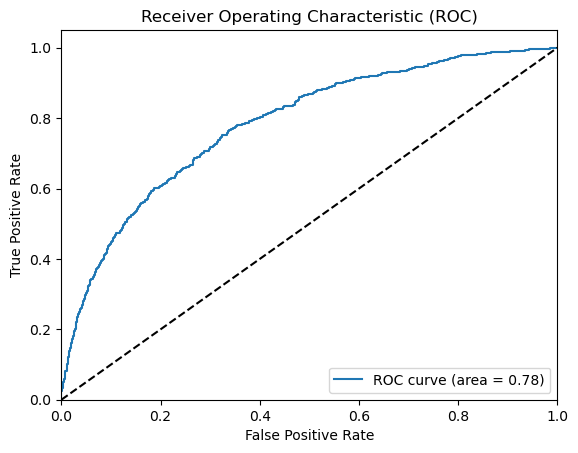

In [87]:
### Part 3::Changing cut off level

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Define different cutoffs for classifying 'Churn'
cutoffs = [0.2, 0.4, 0.5, 0.6, 0.8]

for cutoff in cutoffs:
    # Apply cutoff
    y_pred_cutoff = [1 if x >= cutoff else 0 for x in y_probs]
    
    # Print classification report for each cutoff
    print(f"\nClassification Report for cutoff {cutoff}:")
    print(classification_report(y_test, y_pred_cutoff))

# Optionally, you can also plot the ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [89]:
# Part 4 Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score



# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=skf)

# Output the results
print("Stratified K-Fold Cross-validation scores:", scores)
print("Average score:", scores.mean())

Stratified K-Fold Cross-validation scores: [0.80353929 0.8049805  0.81218122]
Average score: 0.8069003361043962


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [91]:
##step 4:Model Prediction

# Make predictions
y_pred_test= model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.66      0.19      0.30       611

    accuracy                           0.81      3000
   macro avg       0.74      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000



In [93]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Display evaluation metrics

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Confusion Matrix:
 [[2327   62]
 [ 493  118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.66      0.19      0.30       611

    accuracy                           0.81      3000
   macro avg       0.74      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000

